In [1]:
import sys

sys.path.append("../")

In [2]:
from datetime import datetime
from pathlib import Path

import numpy as np

from src.ea_bo import optimize as optimize_bo_old
from src.ea_optimize import optimize_donkey as optimize_rl_donkey
from src.ea_xopt import optimize as optimize_xopt
from src.environments import ea
from src.trial import load_trials

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/beam.py:1567: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  slice_analysis = slice_analysis_py if not nb_flag else nb.jit(slice_analysis_py)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/tm_utils.py:153: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using

In [3]:
BACKEND = "doocs"
LOG_DATA = True  # TODO: Remember to set to True
TRIAL_INDEX = 34
RL_MAX_STEPS = 50
BO_MAX_STEPS = 75
ES_MAX_STEPS = 150

In [4]:
def reset_machine():
    """Set all magnets to zero."""
    env = ea.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()

In [5]:
# # Load problem
trials = load_trials(Path("../data/trials.yaml"))

comment = f"trial_{TRIAL_INDEX:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[TRIAL_INDEX].target_beam[0]
target_sigma_x = trials[TRIAL_INDEX].target_beam[1]
target_mu_y = trials[TRIAL_INDEX].target_beam[2]
target_sigma_y = trials[TRIAL_INDEX].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [08:16<00:00,  9.94s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-09-01 13:28:27.705063\nTime taken: 0:08:07.872559\nNo. of steps: 51\n\nBeam before:\n    mu_x    =  0.2074 mm\n    sigma_x =  0.1042 mm\n    mu_y    = -1.5165 mm\n    sigma_y =  0.2438 mm\n\nBeam after:\n    mu_x    =  0.6499 mm\n    sigma_x =  0.0426 mm\n    mu_y    = -1.6967 mm\n    sigma_y =  0.1562 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.8615 mm\n    |delta_sigma_x| =  0.0049 mm\n    |delta_mu_y|    =  0.0126 mm\n    |delta_sigma_y| =  0.0302 mm\n\n    MAE =  0.2273 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.8475 1/m^2\n    AREAMQZM2 strength = -12.3300 1/m^2\n    AREAMCVM1 kick     

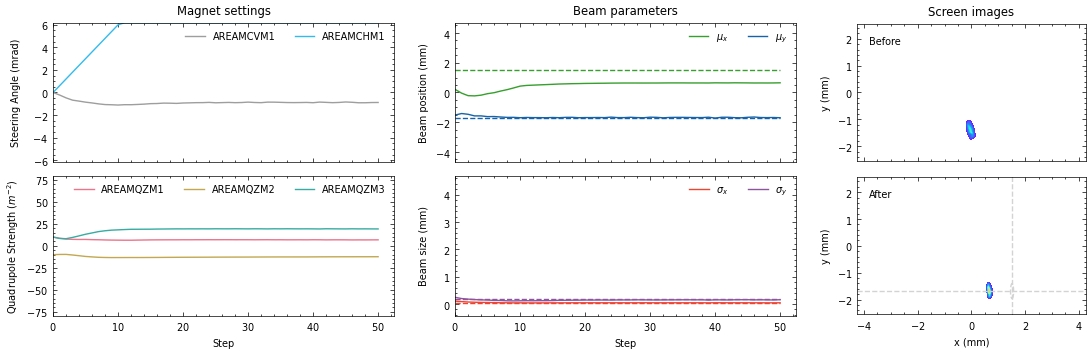

In [6]:
# RL polished donkey
reset_machine()

optimize_rl_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=RL_MAX_STEPS,
    agent_name="polished-donkey-996",
    logbook=True,
    data_log_dir=(
        f"../data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
  7%|▋         | 5/75 [00:54<13:10, 11.29s/it]/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
  8%|▊         | 6/75 [01:05<12:58, 11.28s/it]/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/botorch/models/utils/assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)
/hom

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: BO old\nStart time: 2023-09-01 13:37:50.100672\nTime taken: 0:35:49.337356\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.2247 mm\n    sigma_x =  0.1042 mm\n    mu_y    = -1.5637 mm\n    sigma_y =  0.2417 mm\n\nBeam after:\n    mu_x    =  1.5487 mm\n    sigma_x =  0.0749 mm\n    mu_y    = -2.0199 mm\n    sigma_y =  0.4117 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0373 mm\n    |delta_sigma_x| =  0.0372 mm\n    |delta_mu_y|    =  0.3358 mm\n    |delta_sigma_y| =  0.2252 mm\n\n    MAE =  0.1589 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   7.7201 1/m^2\n    AREAMQZM2 strength =  -0.8604 1/m^2\n    AREAMCVM1 kick     =   0.1257 mr

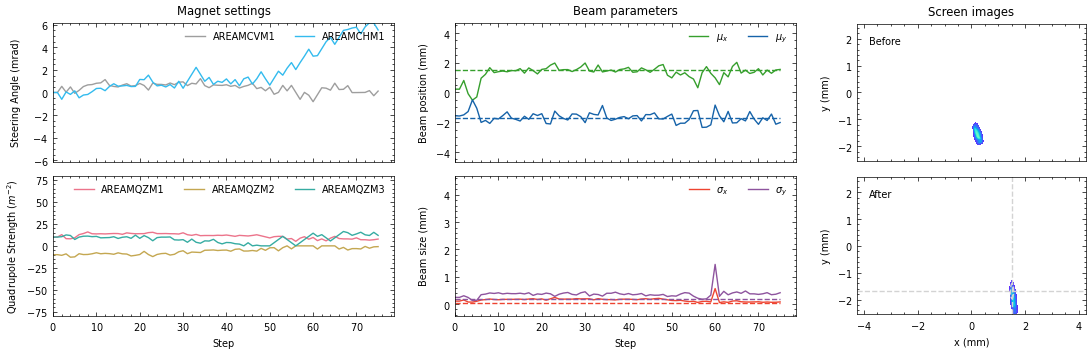

In [7]:
# BO old
reset_machine()

optimize_bo_old(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=BO_MAX_STEPS,
    model_name="BO old",
    logbook=True,
    data_log_dir=(
        f"../data/bo_vs_rl/real/bo_old/{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
    backend=BACKEND,
    set_to_best=False,
)

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 75/75 [23:04<00:00, 18.46s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO hard\nStart time: 2023-09-01 14:14:56.901680\nTime taken: 0:22:53.013321\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.2351 mm\n    sigma_x =  0.1042 mm\n    mu_y    = -1.5115 mm\n    sigma_y =  0.2438 mm\n\nBeam after:\n    mu_x    =  1.5280 mm\n    sigma_x =  0.0954 mm\n    mu_y    = -1.5687 mm\n    sigma_y =  0.4676 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0166 mm\n    |delta_sigma_x| =  0.0577 mm\n    |delta_mu_y|    =  0.1154 mm\n    |delta_sigma_y| =  0.2812 mm\n\n    MAE =  0.1177 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   9.0684 1/m^2\n    AREAMQZM2 strength =  -1.9444 1/m^2\n    AREAMCVM1 kick     =   0.7

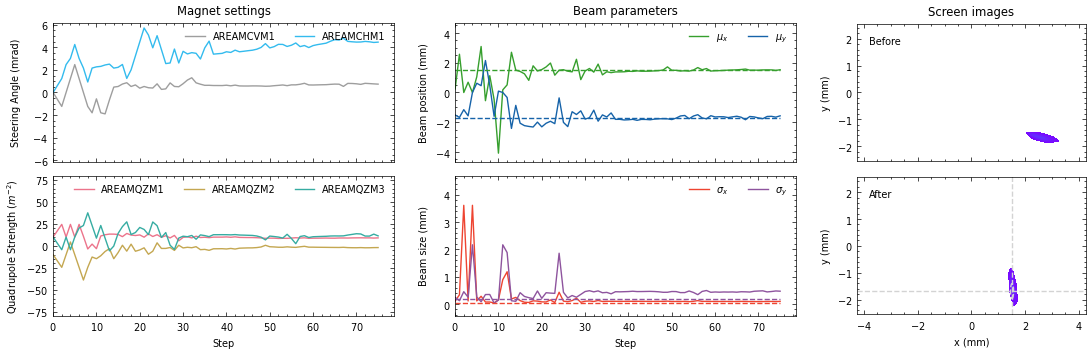

In [8]:
# BO hard
reset_machine()

optimize_xopt(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=BO_MAX_STEPS,
    model_name="Xopt BO hard",
    logbook=True,
    data_log_dir=(
        f"../data/bo_vs_rl/real/bo_hard/{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    method="UCB",
    optimizer_kwargs={
        "beta": 2.0,
        "max_travel_distances": [0.1] * 5,
        "proximal_weights": None,
    },
    rescale_action=(-1, 1),  # TODO: Turn off?
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
    backend=BACKEND,
    set_to_best=False,
)

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 75/75 [25:22<00:00, 20.30s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt BO proximal\nStart time: 2023-09-01 14:39:06.146235\nTime taken: 0:25:10.387140\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.2333 mm\n    sigma_x =  0.1057 mm\n    mu_y    = -1.4705 mm\n    sigma_y =  0.2449 mm\n\nBeam after:\n    mu_x    =  1.4208 mm\n    sigma_x =  0.1013 mm\n    mu_y    = -1.6768 mm\n    sigma_y =  0.3399 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0906 mm\n    |delta_sigma_x| =  0.0636 mm\n    |delta_mu_y|    =  0.0072 mm\n    |delta_sigma_y| =  0.1535 mm\n\n    MAE =  0.0787 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.6933 1/m^2\n    AREAMQZM2 strength =   4.6393 1/m^2\n    AREAMCVM1 kick     =  

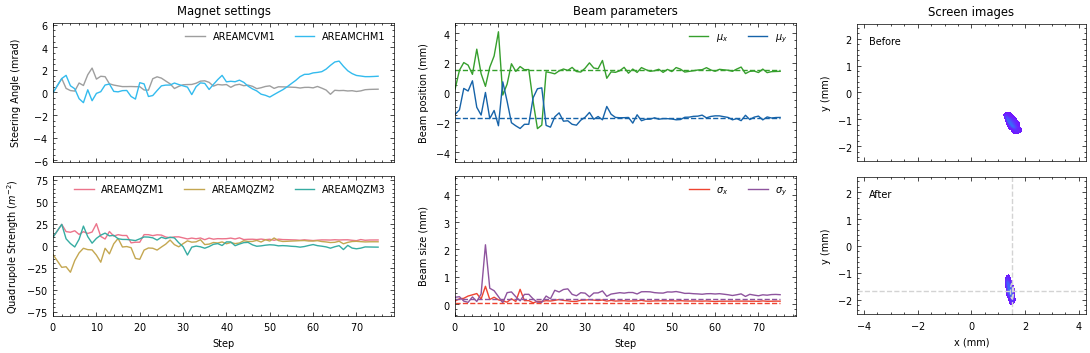

In [9]:
# BO proximal
reset_machine()

optimize_xopt(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=BO_MAX_STEPS,
    model_name="Xopt BO proximal",
    logbook=True,
    data_log_dir=(
        f"../data/bo_vs_rl/real/bo_proximal/{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    method="UCB",
    optimizer_kwargs={
        "beta": 2.0,
        "proximal_weights": 0.5,
        "max_travel_distances": [1.0, 1.0, 1.0, 1.0, 1.0],
    },
    rescale_action=(-1, 1),  # TODO: Turn off?
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
    backend=BACKEND,
    set_to_best=False,
)

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:297: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 150/150 [25:19<00:00, 10.13s/it]

title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: Xopt ES\nStart time: 2023-09-01 15:05:30.513687\nTime taken: 0:24:57.558534\nNo. of steps: 151\n\nBeam before:\n    mu_x    =  0.2316 mm\n    sigma_x =  0.1072 mm\n    mu_y    = -1.4556 mm\n    sigma_y =  0.2470 mm\n\nBeam after:\n    mu_x    =  1.5677 mm\n    sigma_x =  0.1820 mm\n    mu_y    = -1.8695 mm\n    sigma_y =  0.0517 mm\n\nTarget beam:\n    mu_x    =  1.5114 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.0377 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.6841 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1865 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0564 mm\n    |delta_sigma_x| =  0.1444 mm\n    |delta_mu_y|    =  0.1854 mm\n    |delta_sigma_y| =  0.1347 mm\n\n    MAE =  0.1302 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =  21.9402 1/m^2\n    AREAMQZM2 strength = -26.4803 1/m^2\n    AREAMCVM1 kick     =  -1.5505 

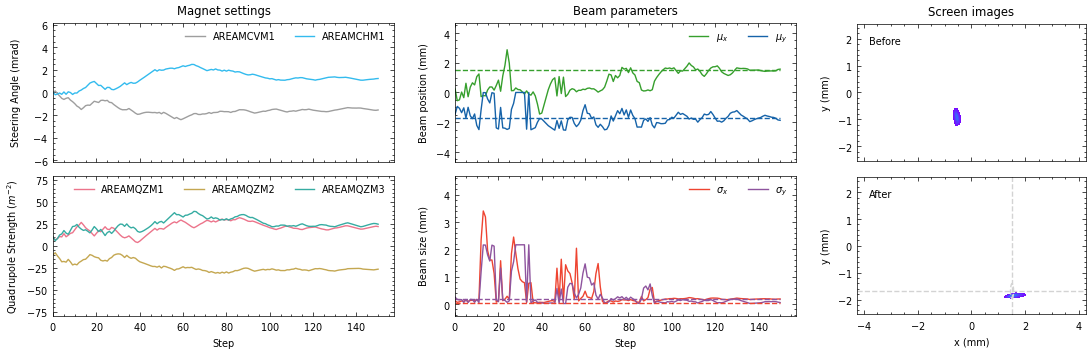

In [10]:
# ES
reset_machine()

optimize_xopt(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=ES_MAX_STEPS,
    model_name="Xopt ES",
    logbook=True,
    data_log_dir=(
        f"../data/bo_vs_rl/real/es/{datetime.now():%Y%m%d%H%M}_{comment}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    method="ES",
    optimizer_kwargs={"k": 3.7, "oscillation_size": 0.11, "decay_rate": 0.987},  # Tuned
    rescale_action=(-1, 1),
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
    backend=BACKEND,
    set_to_best=False,
)